<a href="https://colab.research.google.com/github/c-kruger/Data-Mining/blob/main/DataMiningLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/c-kruger/Data-Mining/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#Data Transformation

First we transform the gender variable to numeric for analysis purposes.

In [10]:
gender_num = df.gender
df['gender_num'] = gender_num
df['gender_num']= df['gender_num'].astype('category')
df['gender_num']= df['gender_num'].cat.codes
df.dtypes[['gender','gender_num']]

gender        object
gender_num      int8
dtype: object

In [13]:
df[['gender', 'gender_num']]

,gender,gender_num
0,Female,0
1,Male,1
2,Male,1
3,Male,1
4,Female,0
...,...,...
7038,Male,1
7039,Female,0
7040,Female,0
7041,Male,1


Next we transform the Partner attribute from categorical to numeric for analysis purposes.

In [14]:
Partner_num = df.Partner
df['Partner_num'] = Partner_num
df['Partner_num']= df['Partner_num'].astype('category')
df['Partner_num']= df['Partner_num'].cat.codes
df.dtypes[['Partner','Partner_num']]

Partner        object
Partner_num      int8
dtype: object

In [15]:
df[['Partner_num', 'Partner']]

,Partner_num,Partner
0,1,Yes
1,0,No
2,0,No
3,0,No
4,0,No
...,...,...
7038,1,Yes
7039,1,Yes
7040,1,Yes
7041,1,Yes


Finally, we transform the attribute Churn to numeric for analysis purposes.

In [16]:
Churn_num = df.Churn
df['Churn_num'] = Churn_num
df['Churn_num']= df['Churn_num'].astype('category')
df['Churn_num']= df['Churn_num'].cat.codes
df.dtypes[['Churn','Churn_num']]

Churn        object
Churn_num      int8
dtype: object

In [17]:
df[['Churn', 'Churn_num']]

,Churn,Churn_num
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1
...,...,...
7038,No,0
7039,No,0
7040,No,0
7041,Yes,1


While coverting Partner might not have a ton of use specifically, I believe that any dichotomous attribute should realistically be made numeric to perform statistical analysis. Certain regression types are only available for numeric data, so ensuring that there is a numeric version of most attributes is important. In terms of analytics, transforming Gender and Churn are important. Gender is typically and important predictor for any predictand. Churn is essentially what this dataset is striving to predict; whether or not an individual will leave Telco based on their other attributes.

#Data Substitution

First, the attribute MultipleLines is given a substitute

In [23]:
df1 = df
df1.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [25]:
df1.MultipleLines.replace('No phone service','N/A', inplace=True)

In [26]:
df1.MultipleLines.unique()

array(['N/A', 'No', 'Yes'], dtype=object)

Next, the attribute 

In [28]:
df2 = df
df2.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [29]:
df2.Contract.replace('Month-to-month','Monthly', inplace=True)

In [30]:
df2.Contract.unique()

array(['Monthly', 'One year', 'Two year'], dtype=object)

While my dataset did not have any strange question marks or missing data of any kind, there were some things I thought could be substituted to assist the coder / analyst. Lengthy attribute options can be a pain to type out over and over when you are working with a specific attribute, and they should only be wordy enough to explain itself. For example, "No phone service" for the variable "Multiple lines" does a well enough job of explaining itself, but "N/A" or "Not applicable" makes more sense, given that the attribute itself is looking at whether or not a person has multiple lines. A person cannot have multiple lines if they do not have a phone service. Additonally, the variable Contract examines what type of contract a customer has with Telco. In all honesty, "Monthly" is just much easier to type and read than "Month-to-month", so it was substitued to keep things simple.

#Data Reduction

In [31]:
df.MonthlyCharges.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [32]:
df.TotalCharges.describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [33]:
bins = np.linspace(df.MonthlyCharges.min(),df.MonthlyCharges.max(),4)
bins

array([ 18.25,  51.75,  85.25, 118.75])

In [34]:
labels = ['Low', 'Average', 'High']

In [35]:
df3=df
df3['bins'] = pd.cut(df3['MonthlyCharges'], bins=bins, labels=labels, include_lowest=True)

In [36]:
df3.groupby(['bins']).count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_num,Partner_num,Churn_num
bins,,,,,,,,,,,,,,,,,,,,,,,,
Low,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451,2451
Average,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439,2439
High,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153,2153


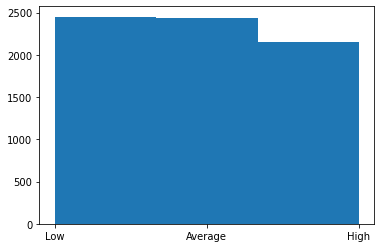

In [38]:
plt.hist(df3['bins'], bins=3);

In [41]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [42]:
bins = np.linspace(df.tenure.min(),df.tenure.max(),4)
bins

array([ 0., 24., 48., 72.])

In [43]:
labels = ['Short', 'Average', 'Long']

In [45]:
df4=df
df4['bins'] = pd.cut(df4['MonthlyCharges'], bins=bins, labels=labels, include_lowest=True)

In [46]:
df4.groupby(['bins']).count()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_num,Partner_num,Churn_num
bins,,,,,,,,,,,,,,,,,,,,,,,,
Short,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215
Average,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940,940
Long,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500


I chose the variable MonthlyCharges for binning because of the wide range of customers. Since each customer picks from several different services, the distribution of a customers monthly charge should be pretty normal. Seeing how many individuals fall within each section of monthly charges is useful for determining high paying vs. low paying customers. I chose the variable tenure for binning because the purpose of this dataset is customer retainment. It is important to have an idea of your long term customers and your short term customers to see which services they choose and whether or not they leave or stay with Telco.

#Question 4 - Organizational Analytical Questions

1.) Out of all of our long term customers (binned from the tenure attribute), how many have left Telco for a competitor (0 for Churn attribute)?
2.) Are customers with high monthly charges long term or short term customers? 

Both of these are useful for dealing with customer retainment. It is important to understand the relationship between tenure, an individuals monthly charge, and whether or not they have left (or if similar individuals to them are leaving). These questions allow Telco to determine this (or the analyst in charge, I suppose).